# Market Analytics

## Context

> Problem Statement: recent marketing campaigns have not been as effective as they were expected to be. I need to analyze the data set to understand this problem and propose data-driven solutions.

## Section 01: Exploratory Data Analysis
- Are there any null values or outliers? How will you wrangle/handle them?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data? Can you plot them?

##  Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

- What factors are significantly related to the number of store purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?

##  Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

- Which marketing campaign is most successful?
- What does the average customer look like for this company? Which products are performing best?
- Which channels are underperforming?

##  Section 04: CMO Recommendations
- Bring together everything from Sections 01 to 03 and provide data-driven recommendations/suggestions to your CMO.



### Gather

In [72]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [73]:
#load data
df = pd.read_csv('marketing_data.csv')

### Features Information from Kaggle:

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Tennhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumDealsPurchase: Number of purchases made with a discount
- NumWebPurchase: Number of purchases made through the company's web site
- NumCatalogPurchase: Number of purchases made using a catalogue
- NumStorePurchase: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company's web site in the last month
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 2 if customer accepted the offer in the 1st campaign, 0 otherwise
- Respones: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Country: Customer's location






### Assess

In [74]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [75]:
def basic_info(df):
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(df.info())

In [76]:
basic_info(df)

This dataset has  28  columns and  2240  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
                 ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232  

### Assessment report: 

**Quality issues**

- There is a space in front of the income's column name
- There are dollar signs is the values of Income column
- The "Income" column has 23 missing values
- Income's type is string
- Dt_Customer's type is string

### Data Cleaning

In [77]:
df_copy = df.copy()

**Issue 1: There is a space in front of the income's column name**

#### Code

In [78]:
df_copy.rename(columns={' Income ':'Income'}, inplace=True)

#### Test

In [79]:
df_copy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

**Issue 2: There are dollar signs, spaces, commas, and dots is the values of Income column**

#### Code

In [80]:
df_copy.Income = df_copy.Income.str.strip('$')
df_copy.Income = df_copy.Income.str.replace(".", "")
df_copy.Income = df_copy.Income.str.replace(",", "")
df_copy.Income = df_copy.Income.str.replace("00 ", "")

#### Test

In [81]:
df_copy.Income.sample(5)

506    57420
423    57136
493    46014
560    52278
552    44551
Name: Income, dtype: object

In [82]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

**Issue 3: The "Income" column has 23 missing values**

**Issue 4: Income's type is string**

#### Code

In [83]:
# divide the data into two dataframes: one has income values, and the other doesn't.
have_income = df_copy[df_copy.Income.isnull()==False]
missing_income = df_copy[df_copy.Income.isnull()==True]

In [84]:
# Convert the one that has income to int type
have_income.Income = have_income.Income.astype(int)

# give a string value of "0" to missing value, then we can convert it into int type
missing_income.Income = str(have_income.Income.median())

missing_income.Income = missing_income.Income.str.replace(".5", "")
missing_income.Income = missing_income.Income.astype(int)

In [85]:
#combine the data
df_copy = missing_income.append(have_income)

#### Test

In [86]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 134 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int32 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumW

**Issue 5: Dt_Customer's type is string**

#### Code

In [87]:
df_copy.Dt_Customer = pd.to_datetime(df_copy.Dt_Customer)

#### Test

In [88]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 134 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int32         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-n

### Final step of Wrangling: Store data

In [89]:
# store the file
df_copy.reset_index(drop=True)
df_copy.to_csv('clean_df.csv', index=False)

In [90]:
#load data
df = pd.read_csv('clean_df.csv')

## Section 01: Exploratory Data Analysis

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

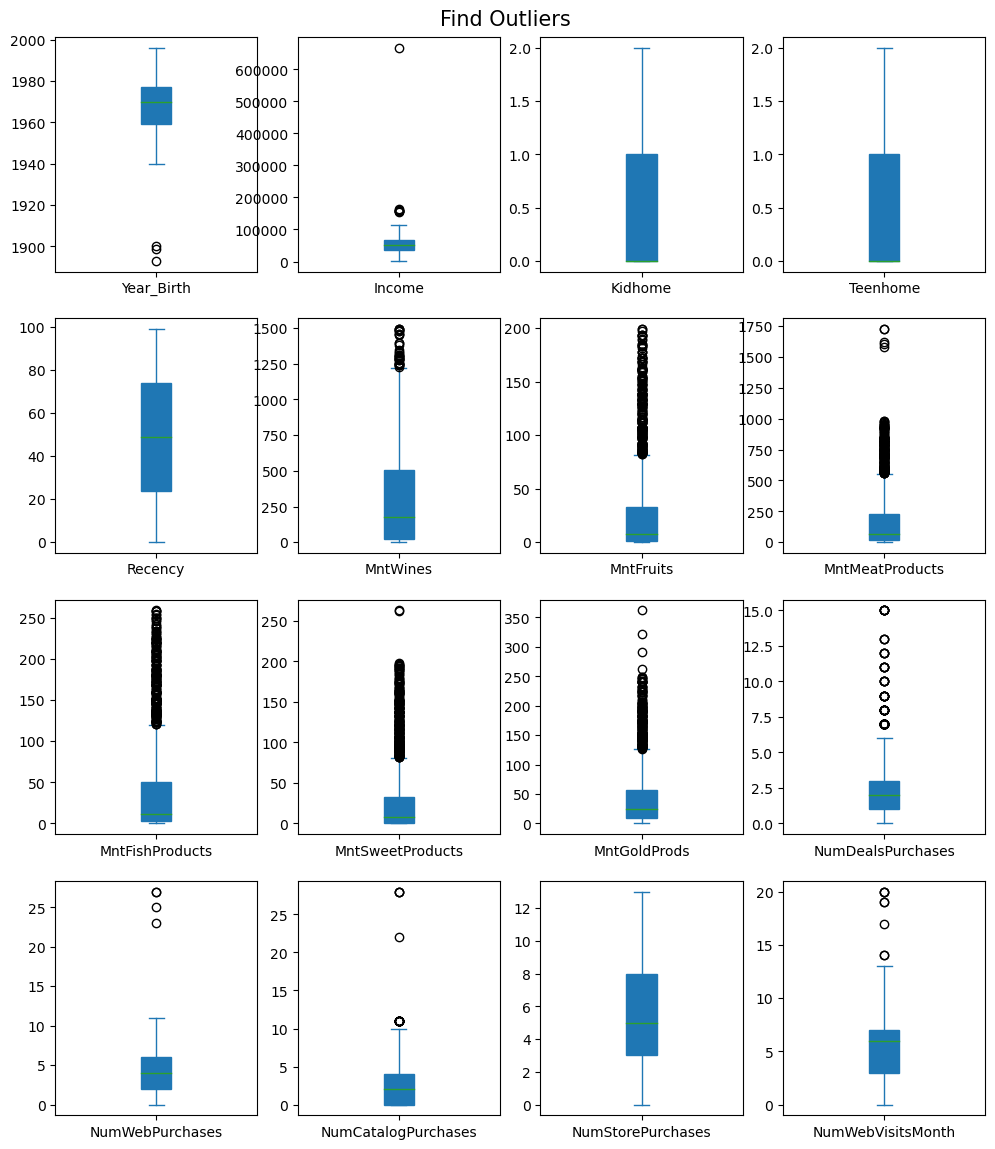

In [92]:
# See if there is any outliers

# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

### Section 1-1:  Are there any null values or outliers? How will you wrangle/handle them?
- Income has 23 null values, and I used the median number to fill in.
- There are many columns having outliers, but most of them seem like natural outliers came from population, whereas the outliers in  Year_birth seems like entry errors since it's impossible that people who was born before 1900 still alive. Therefore, I will remove the outliers in Year_birth.
(Reference: https://statisticsbyjim.com/basics/remove-outliers/)

In [93]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [94]:
# Remove outliers in year_birth
new_df = df[df.Year_Birth >= (df.Year_Birth.mean()-3*df.Year_Birth.std())]
new_df.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

### Section 1-2: Are there any useful variables that you can engineer with the given data?

- Join_year: The year that person became a customer, which can be engineered from "Dt_Customer"
- Join_month: The month that person became a customer, which can be engineered from "Dt_Customer"
- Join_weekday: The day of the week that person became a customer, which can be engineered from "Dt_Customer"
- Minorhome: The total amount of minors in their family, which can be acquired by summing up by Kidhome and Teenhome.
- Total_Mnt: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns
- Total_num_purchase: Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns
- Total_accept: Total amount a customer accepted the offer in marketing campaign, which can be acquired by summing up all the "Accepted"-related columns and the "Response" column
- "AOV": AOV stands for the average order volumn of each customer, which can be engineerd by dividing Total_Mnt by Total_num_purchase

In [95]:
new_df.Dt_Customer = pd.to_datetime(new_df.Dt_Customer)

In [96]:
# Create new features
new_df["Join_year"] = new_df.Dt_Customer.dt.year
new_df["Join_month"] = new_df.Dt_Customer.dt.month
new_df["Join_weekday"] = new_df.Dt_Customer.dt.weekday
new_df["Minorhome"] = new_df.Kidhome + new_df.Teenhome
new_df['Total_Mnt'] = new_df.MntWines+ new_df.MntFruits+ new_df.MntMeatProducts+ new_df.MntFishProducts+ new_df.MntSweetProducts+ new_df.MntGoldProds 
new_df['Total_num_purchase'] = new_df.NumDealsPurchases+ new_df.NumWebPurchases+ new_df.NumCatalogPurchases+ new_df.NumStorePurchases+ new_df.NumWebVisitsMonth 
new_df['Total_accept'] = new_df.AcceptedCmp1 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2  + new_df.AcceptedCmp3 + new_df.AcceptedCmp4 + new_df.AcceptedCmp5 + new_df.Response
new_df['AOV'] = new_df.Total_Mnt/new_df.Total_num_purchase

In [97]:
new_df.sample(6)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Join_year,Join_month,Join_weekday,Minorhome,Total_Mnt,Total_num_purchase,Total_accept,AOV
959,10581,1977,Graduation,Married,41124,1,0,2012-10-31,41,281,7,84,15,0,119,7,7,3,4,8,0,0,0,0,0,0,0,SP,2012,10,2,1,506,29,0,17.448276
85,10623,1961,Master,Together,48330,0,1,2013-11-15,2,28,0,4,0,0,0,1,1,0,3,5,0,0,0,0,0,0,0,SP,2013,11,4,1,32,10,0,3.200000
1345,1411,1952,Graduation,Divorced,82623,0,0,2013-11-10,58,204,34,204,172,153,173,1,2,9,4,1,0,0,0,0,0,0,0,SP,2013,11,6,0,940,17,0,55.294118
264,3885,1983,PhD,Married,33569,1,0,2013-10-16,10,16,2,18,3,0,24,1,1,1,2,8,1,0,0,0,0,1,0,SP,2013,10,2,1,63,13,2,4.846154
925,1055,1976,Master,Married,53204,1,1,2014-03-20,40,29,0,8,2,0,6,1,1,0,3,4,0,0,0,0,0,0,0,GER,2014,3,3,2,45,9,0,5.000000
2112,9286,1960,Master,Together,83151,0,0,2012-10-10,93,407,28,100,120,74,18,1,5,9,4,3,0,0,0,0,0,0,0,SP,2012,10,2,0,747,22,0,33.954545


### Section 1-3: Do you notice any patterns or anomalies in the data? Can you plot them?
We can use a heatmap to see the correlations between each variable. When it gets bluer, it means they are positively correlated, and when it gets redder, they are negatively correlated.

### Patterns: 
1. High Income People
    - tend to spend more and purchase more.
    - tend to visit the company's website less frequently than other people. 
    - tend to has few number of purchases made with a discount

2. People having kids at home
    - tend to spend less and purchase less.
    - tend to has high number of purchases made with a discount


3. People who purchased with high average order volumne 
    - tend to buy more wines and meat products
    - tend to make high number of purchases made using a catalog
    - tend to not visit the company's website. 

### Anomalies:
1. Intuitively, I'd think the more complaints a customer has, the less he/she may spend on our store, but the number of complain in the last two years has almost no correlation with the total amount spent in the last two years
=> After further investigating the data, I found that it is because we only have 20 customers who complained in the last two years, but we have 2200 customers in total. The customer service in the company has done a wonderful job in the last two years.

### See the correlation between variables

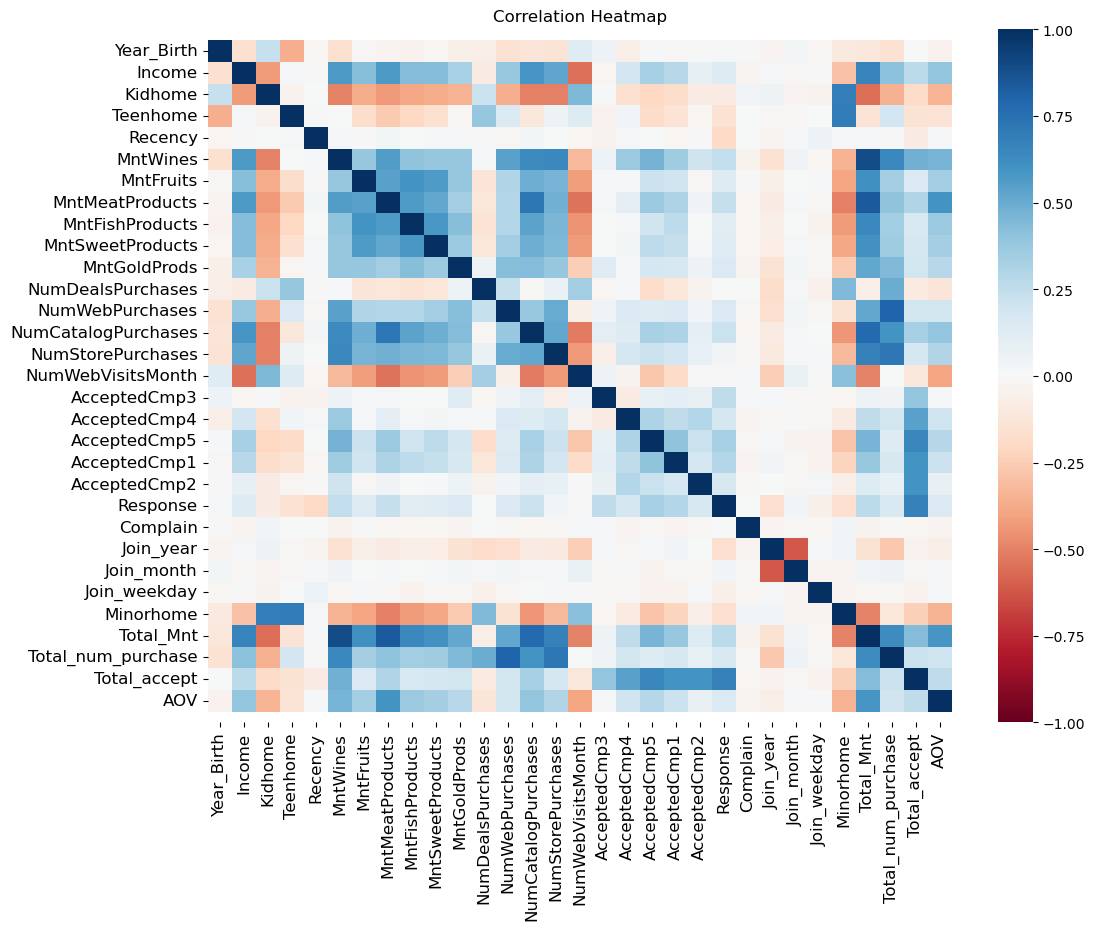

In [98]:
# select columns to plot
df_to_plot = new_df.drop(columns=['ID'])

# create heatmap
plt.figure(figsize = (12, 9))
s = sb.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

In [99]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

<Figure size 3000x2000 with 0 Axes>

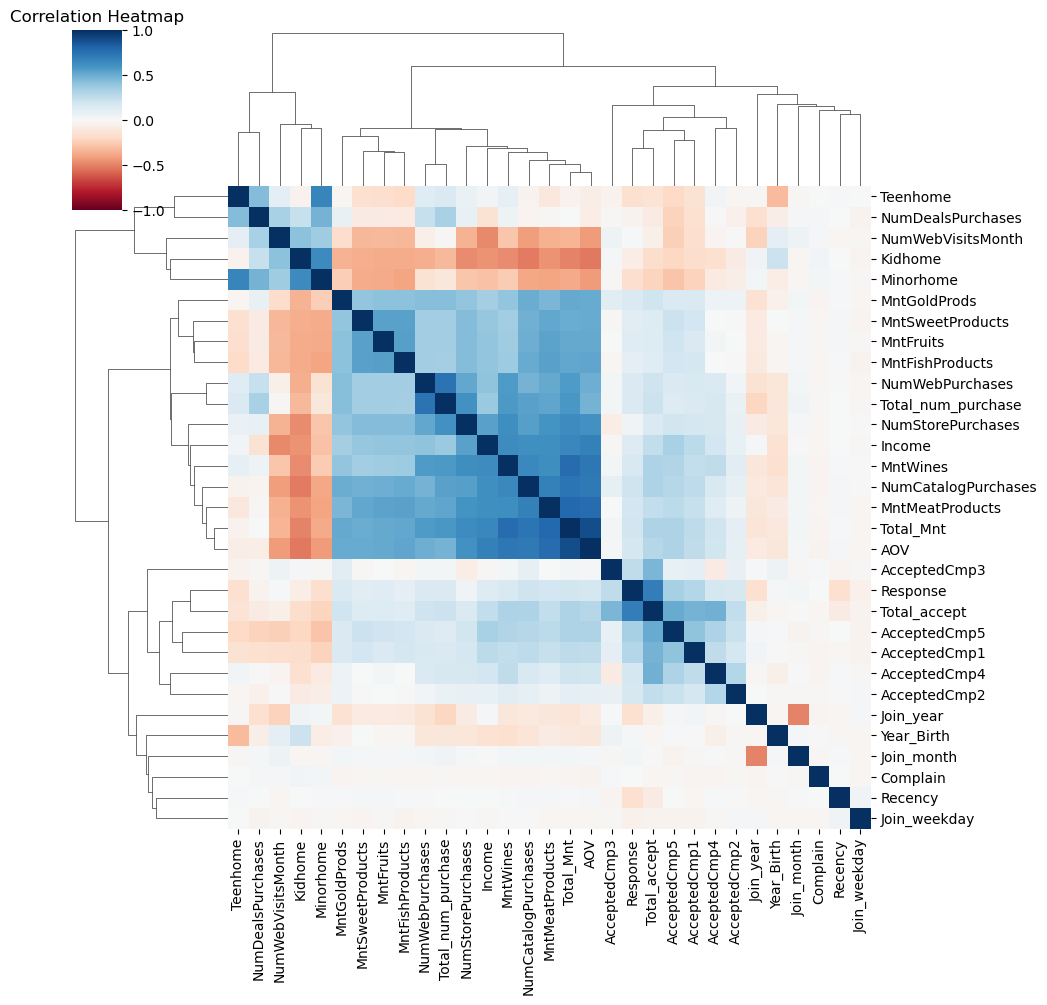

In [100]:
# select columns to plot
df_to_plot = new_df.drop(columns=['ID'])

plt.figure(figsize = (30, 20))
s = sb.clustermap(df_to_plot.corr(method = 'kendall'),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)

plt.title("Correlation Heatmap")
plt.show()

### Anomoly
Intuitively, I'd think the more complaints a customer has, the less he/she may spend on our store, but the number of complain in the last two years has almost no correlation with the total amount spent in the last two years

In [101]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

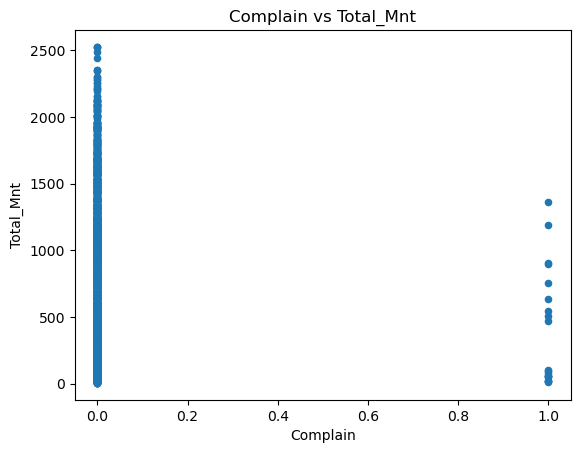

In [102]:
# Visualize NumWebPurchases vs NumWebVisitsMonth
new_df.plot(x='Complain', y='Total_Mnt', kind='scatter')
plt.title("Complain vs Total_Mnt");

In [103]:
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=new_df['Complain'], y=new_df['Total_Mnt'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.03373965091266399
Pearson p-value:  0.11063526070954043


In [104]:
new_df[new_df.Complain > 0].ID.nunique()

20

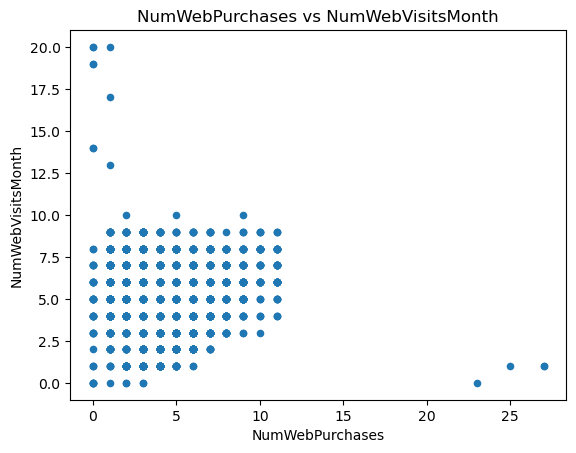

In [105]:
# Visualize NumWebPurchases vs NumWebVisitsMonth
new_df.plot(x='NumWebPurchases', y='NumWebVisitsMonth', kind='scatter')
plt.title("NumWebPurchases vs NumWebVisitsMonth");

> Indeed, the scatter plot of NumWebPurchases vs NumWebVisitsMonth doesn't show any correlation. 

### Section 2-1: What factors are significantly related to the number of store purchases?

We can use random forest to predict the number of store purchases and then use the model's feature importance score to rank the factors.

> Top 7 factors are 
    1. Total amount spent in the last two years
    2. Average order volume
    3. Total number of purchases in the last two years
    4. Amount spent on wine in the last 2 years
    5. Number of purchases made using a catalog
    6. Number of visits to company's web site in the last month
    7. Total number of purchases through website in the last two years

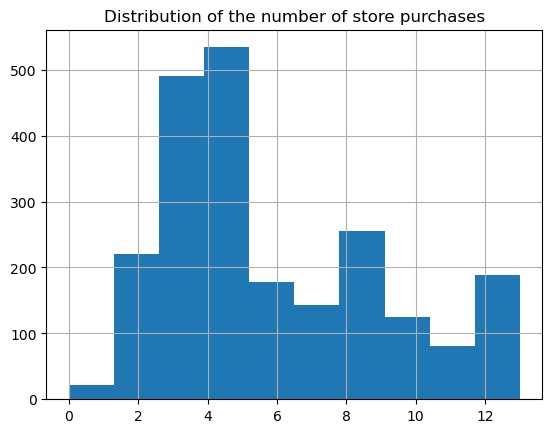

In [106]:
new_df.NumStorePurchases.hist()
plt.title("Distribution of the number of store purchases");

In [ ]:
High_Income=new_df[new_df['Income']>50000]
Low_Income=new_df[new_df['Income']<=50000]
high_income_purchases = High_Income['Total_num_purchase'].sum()
low_income_purchases = Low_Income['Total_num_purchase'].sum()
print("High income purchases:", high_income_purchases)
print("Low income purchases:", low_income_purchases)

In [ ]:
high_income_discount_purchases = High_Income['NumDealsPurchases'].sum()
low_income_discount_purchases = Low_Income['NumDealsPurchases'].sum()

high_income_website_visits = High_Income['NumWebPurchases'].sum()
low_income_website_visits = Low_Income['NumWebPurchases'].sum()
high_income_store_purchases = High_Income['NumStorePurchases'].sum()
low_income_store_purchases = Low_Income['NumStorePurchases'].sum()
high_income_catalog_purchases = High_Income['NumCatalogPurchases'].sum()
low_income_catalog_purchases = Low_Income['NumCatalogPurchases'].sum()

labels = ['High Income', 'Low Income']
purchases = [high_income_purchases, low_income_purchases]
website_visits = [high_income_website_visits, low_income_website_visits]
purchases_with_discount = [high_income_discount_purchases, low_income_discount_purchases]
store_purchases = [high_income_store_purchases, low_income_store_purchases]
catalog_purchases = [high_income_catalog_purchases, low_income_catalog_purchases]

bar_width = 0.15
index = np.arange(len(labels))

plt.figure(figsize=(12, 6))

plt.barh(index, purchases, bar_width, color='steelblue', label='Purchases')
plt.barh(index + bar_width, website_visits, bar_width, color='orange', label='Website Visits')
plt.barh(index + 2 * bar_width, purchases_with_discount, bar_width, color='green', label='Purchases with Discount')
plt.barh(index + 3 * bar_width, store_purchases, bar_width, color='purple', label='Store Purchases')
plt.barh(index + 4 * bar_width, catalog_purchases, bar_width, color='red', label='Catalog Purchases')

plt.xlabel('Count')
plt.ylabel('Income')
plt.title('Comparison of Customer Metrics by Income')
plt.yticks(index + 2 * bar_width, labels)
plt.legend()
plt.savefig('Comparison of Purchases between High and Low Income Customers', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [107]:
# drop ID as everyone has unique ID
rd_df = new_df.drop(columns=['ID', 'Dt_Customer'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding
rd_df = pd.get_dummies(rd_df)

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=rd_df.drop(columns=['NumStorePurchases'])  # Features
y=rd_df['NumStorePurchases']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Classifier with 100 trees
rg = RandomForestRegressor(n_estimators=200, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rg.fit(X_train, y_train)

y_pred=rg.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7722247023809524
Mean Squared Error: 1.358973474702381
Root Mean Squared Error: 1.165750176797062


In [ ]:
No_Kids=new_df[new_df['Minorhome']==0]
Having_Onekid=new_df[new_df['Minorhome']==1]
Having_kids=new_df[new_df['Minorhome']<1]

In [ ]:
with_kids_purchases = Having_kids['Total_num_purchase'].sum()
with_Onekid_purchases = Having_Onekid['Total_num_purchase'].sum()
without_kids_purchases = No_Kids['Total_num_purchase'].sum()

# Create a bar plot
labels = ['With Kids','With One Kid', 'Without Kids']
purchases = [with_kids_purchases, with_Onekid_purchases,without_kids_purchases]

plt.bar(labels, purchases)
plt.xlabel('Has Kids')
plt.ylabel('Number of Purchases')
plt.title('Comparison of Purchases based on Having Kids')
plt.savefig('Comparison of Purchases Based on Number of Kids', bbox_inches='tight')
plt.show()

> Finding: The range of NumStorePurchases is 13, and the Root Mean Squared Error is only 1.1(less than 10% of the range), which means it is a relaible model.

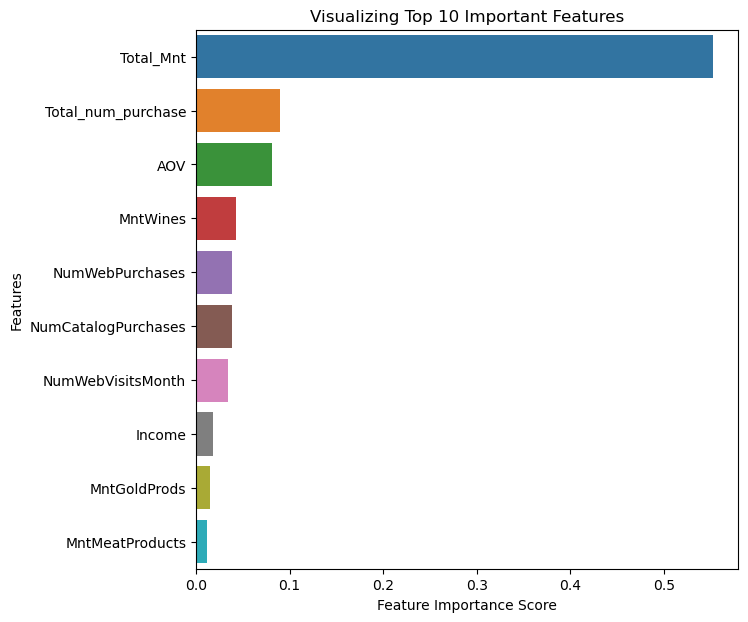

In [108]:
# find feature importance scores
import pandas as pd
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sb.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

 98%|===================| 657/672 [00:29<00:00]        

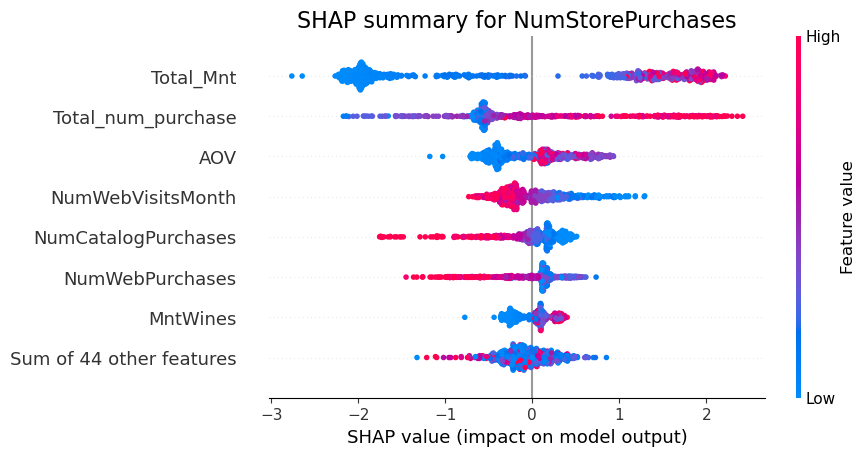

<Figure size 640x480 with 0 Axes>

In [110]:
import shap

# calculate shap values 
ex = shap.Explainer(rg, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
fig = shap.plots.beeswarm(shap_values, max_display=8)
plt.savefig('SHAP.png', bbox_inches='tight')
plt.show()

> Finding:
    1. The number of store purchase increases with higher total amount spent, higher total purchase amount, higher AOV, and higher amount of wines purchases.
    2. The number of store purchase decreases with higher number of website visits, higher number of purchases through catalog, and higher number of purchases through websites.
    
> Summary: People who mostly shop at store tend to buy more wines, have higher average order volumne, and shop less through internet of catalog.

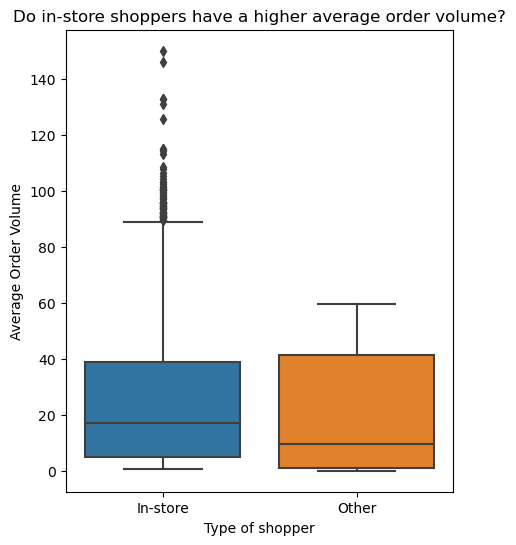

In [114]:
store_shoppers = new_df[new_df.NumStorePurchases>0]
store_shoppers = store_shoppers[store_shoppers.AOV <= (store_shoppers.AOV.mean()+3*store_shoppers.AOV.std())]
store_shoppers['Type of shopper'] = "In-store"
other_shoppers = new_df[new_df.NumStorePurchases==0]
other_shoppers['Type of shopper'] = "Other"

plt.figure(figsize = (5, 6))
all_shoppers = store_shoppers.append(other_shoppers)
plt.title("Do in-store shoppers have a higher average order volume?")
sb.boxplot(data = all_shoppers, x = 'Type of shopper', y = 'AOV')
plt.ylabel("Average Order Volume")
plt.savefig('AOV.png', bbox_inches='tight')

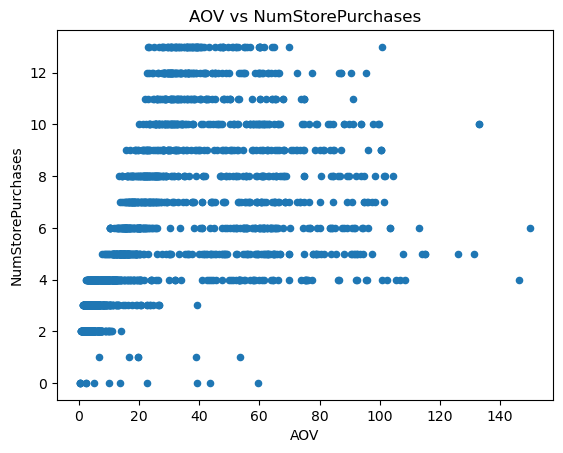

In [115]:
# Visualize MntGoldProds vs NumStorePurchases
all_shoppers.plot(x='AOV', y='NumStorePurchases', kind='scatter')
plt.title("AOV vs NumStorePurchases");
plt.savefig('AOV vs NumStorePurchases.png', bbox_inches='tight')

In [116]:
from scipy.stats import pearsonr
all_shoppers.replace([np.inf, -np.inf], 0, inplace=True)
r, p_value  =  pearsonr(x=all_shoppers['AOV'], y=all_shoppers['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.5505389394031128
Pearson p-value:  2.0526348645433665e-177


### Section 2-2: Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

Yes, they are statistically significant that they have positive correlation

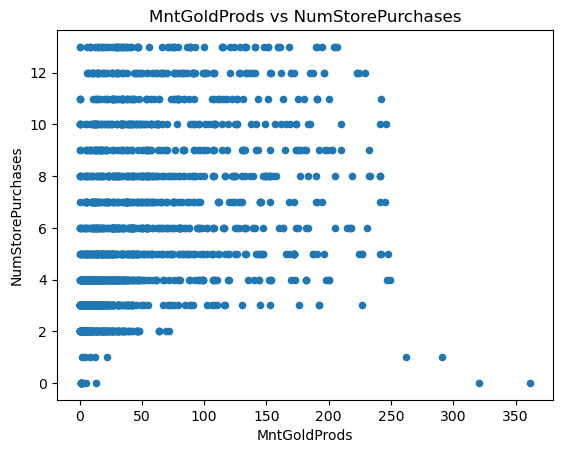

In [117]:
# Visualize MntGoldProds vs NumStorePurchases
new_df.plot(x='MntGoldProds', y='NumStorePurchases', kind='scatter')
plt.title("MntGoldProds vs NumStorePurchases");
plt.savefig('MntGoldProds vs NumStorePurchases.png', bbox_inches='tight')

In [118]:
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=new_df['MntGoldProds'], y=new_df['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.383264186347043
Pearson p-value:  3.466897441779716e-79


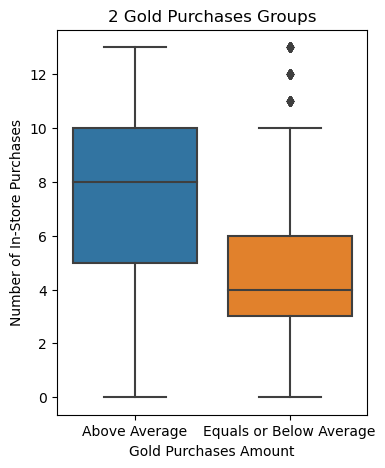

In [119]:
gold_above_avg =  new_df[new_df.MntGoldProds > new_df.MntGoldProds.mean()]
gold_above_avg['Gold Purchases Amount'] = "Above Average"
gold_equ_or_below_avg =  new_df[new_df.MntGoldProds <= new_df.MntGoldProds.mean()]
gold_equ_or_below_avg['Gold Purchases Amount'] = "Equals or Below Average"

plt.figure(figsize = (4, 5))
df_gold = gold_above_avg.append(gold_equ_or_below_avg)
plt.title("2 Gold Purchases Groups")
sb.boxplot(data = df_gold, x = 'Gold Purchases Amount', y = 'NumStorePurchases')
plt.ylabel("Number of In-Store Purchases");

### Section 2-3: Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? 

Married PhD spends less on fish products than the rest.

In [120]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

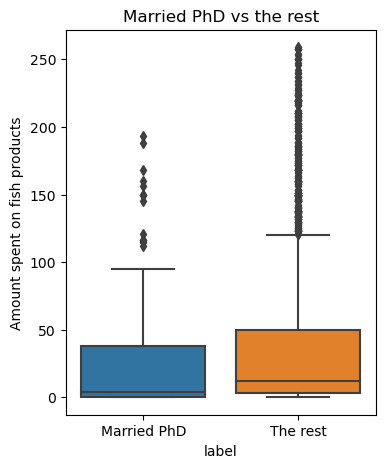

In [121]:
# divide the data into two groups: married PhD and the rest
married_phd = new_df[(new_df.Education == "PhD") & (new_df.Marital_Status == "Married")]
married_phd['label'] = "Married PhD"
the_rest = new_df[(new_df.Education != "PhD") | (new_df.Marital_Status != "Married")]
the_rest['label'] = "The rest"

df_combined = married_phd.append(the_rest)
plt.figure(figsize = (4, 5))
plt.title("Married PhD vs the rest")
sb.boxplot(data = df_combined, x = 'label', y = 'MntFishProducts')
plt.ylabel("Amount spent on fish products");
plt.savefig('Married PhD vs the rest.png', bbox_inches='tight')

In [122]:
# use t-test to test these two groups have the same mean
from scipy.stats import ttest_ind 

#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
#This test assumes that the populations have identical variances by default.
pval = ttest_ind(married_phd.MntFishProducts, the_rest.MntFishProducts).pvalue
print("T-test p-value: ", pval)

T-test p-value:  0.005297012242158541


> Note: Since p-value is less than 0.05, I concluded that we reject the null hypothesis, meaning that their means are not only different, but the Married Phd's mean is lower than the rest as we can see from the graph.

### Section 3-1: Which marketing campaign is most successful?

The last marketing campaign is most successful. 

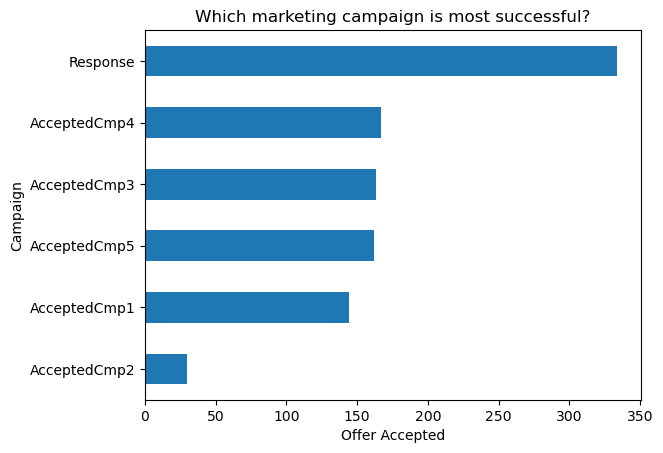

In [123]:
new_df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Which marketing campaign is most successful?")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")
plt.savefig('Which marketing campaign is most successful.png', bbox_inches='tight')

### Section 3-2: What does the average customer look like for this company?

An average customer...
- has an annual income of 52200 dollars
- had purchased 49 days ago
- has an AOV of 26.8 dollars
- has spent 605 dollars
- has purchased 20 times
- became a customer in mid-June
- became a customer on Thursday
- spent most on wines(300 dollars) and then meat products(165 dollars)
- spent least on fruit(26 dollars) and sweet products(27 dollars)

In [124]:
new_df.replace([np.inf, -np.inf], 0, inplace=True)

In [125]:
new_df.mean()

ID                      5590.726419
Year_Birth              1968.901654
Income                 52227.402325
Kidhome                    0.444345
Teenhome                   0.506482
Recency                   49.104604
MntWines                 303.995530
MntFruits                 26.270451
MntMeatProducts          166.916853
MntFishProducts           37.523022
MntSweetProducts          27.068842
MntGoldProds              43.968708
NumDealsPurchases          2.326777
NumWebPurchases            4.087170
NumCatalogPurchases        2.662494
NumStorePurchases          5.794367
NumWebVisitsMonth          5.319177
AcceptedCmp3               0.072865
AcceptedCmp4               0.074654
AcceptedCmp5               0.072418
AcceptedCmp1               0.064372
AcceptedCmp2               0.013411
Response                   0.149307
Complain                   0.008941
Join_year               2013.027716
Join_month                 6.465802
Join_weekday               2.988824
Minorhome                  0

### Section 3-3: Which marketing channels are underperforming?
Catalog is the most underperforming channel.

Text(0, 0.5, 'Channel')

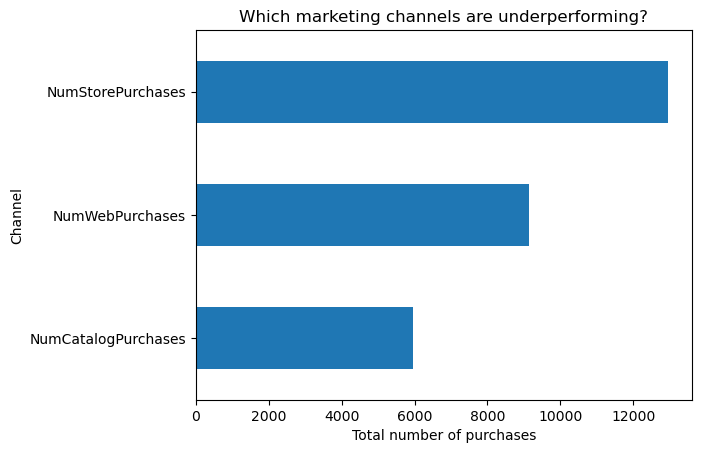

In [126]:
new_df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Which marketing channels are underperforming?")
plt.xlabel("Total number of purchases")
plt.ylabel("Channel")

## Further Investigation:
Now that we know the last campaign is the most successful one, we can further investigate the differences in the customer characteristics and purchases behaviors(listed below) between the most succesful campaing, the last one, and the rest of the campaigns, the campaign 1-5.

- Characteristics: 'Year_Birth', 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday'
- Purchase behaviors: 
    - Products: 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'
    - Channel: 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
    - Total: 'Total_Mnt', 'Total_num_purchase', 'AOV'


In [127]:
# create 2 groups that accepted the offers from the last campaign and the campaign 1-5
cp_last = new_df[new_df.Response > 0]
cp__the_rest = new_df[new_df.AcceptedCmp2 == 0]

cp_last.shape[0], cp__the_rest.shape[0]

(334, 2207)

In [128]:
new_df.Country.value_counts()

SP     1094
SA      336
CA      268
AUS     160
IND     147
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [129]:
# remove the overlapping customers who accepted offers from both cp_last and cp__the_rest 
# so that twe can see the clear differences between these two groups
cp__the_rest2 = cp__the_rest
for i in list(cp__the_rest.ID):
    if i in list(cp_last.ID):
        cp__the_rest2 = cp__the_rest2[cp__the_rest2.ID != i]
        
cp_last.shape[0], cp__the_rest2.shape[0]

(334, 1893)

In [130]:
cp_last = cp_last[['Year_Birth', 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]
cp__the_rest2 = cp__the_rest2[['Year_Birth', 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]

In [131]:
cp_last.mean()

Year_Birth              1969.416168
Income                 60183.242515
Minorhome                  0.646707
Join_month                 6.739521
Join_weekday               2.700599
MntWines                 502.703593
MntFruits                 38.203593
MntMeatProducts          294.353293
MntFishProducts           52.050898
MntSweetProducts          38.634731
NumWebPurchases            5.071856
NumCatalogPurchases        4.203593
NumStorePurchases          6.095808
Total_Mnt                987.392216
Total_num_purchase        23.000000
AOV                       41.829197
dtype: float64

In [132]:
new_df2 = new_df[['Year_Birth', 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]
new_df2.mean()

Year_Birth              1968.901654
Income                 52227.402325
Minorhome                  0.950827
Join_month                 6.465802
Join_weekday               2.988824
MntWines                 303.995530
MntFruits                 26.270451
MntMeatProducts          166.916853
MntFishProducts           37.523022
MntSweetProducts          27.068842
NumWebPurchases            4.087170
NumCatalogPurchases        2.662494
NumStorePurchases          5.794367
Total_Mnt                605.743406
Total_num_purchase        20.189987
AOV                       26.842831
dtype: float64

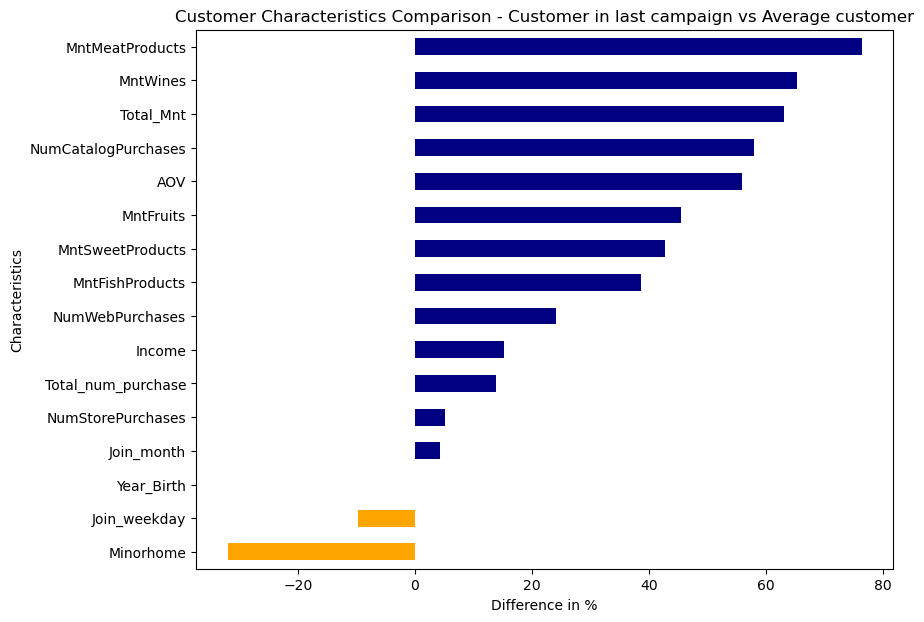

In [133]:
# visualize the differences
plt.figure(figsize = (9, 7))
value1 = pd.DataFrame((((cp_last.mean()) - new_df2.mean()) / new_df2.mean())*100)
value1.dropna(inplace = True)
value1.sort_values(by=0,inplace = True)
value1['positive'] = value1[0] >=0
value1[0].plot(kind='barh', color=value1.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - Customer in last campaign vs Average customer")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics");

In [134]:
cp__the_rest2.mean()

Year_Birth              1968.807184
Income                 50753.805600
Minorhome                  1.005283
Join_month                 6.409403
Join_weekday               3.032752
MntWines                 265.836767
MntFruits                 24.267829
MntMeatProducts          144.358690
MntFishProducts           34.996302
MntSweetProducts          25.112520
NumWebPurchases            3.918119
NumCatalogPurchases        2.384046
NumStorePurchases          5.728473
Total_Mnt                535.491812
Total_num_purchase        19.681986
AOV                       24.083059
dtype: float64

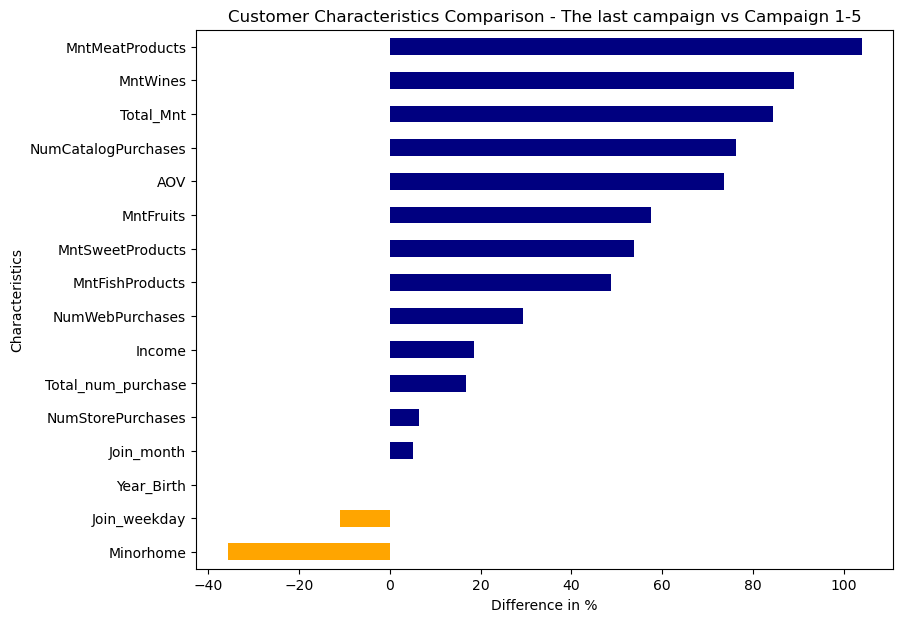

In [135]:
# visualize the differences
plt.figure(figsize = (9, 7))
value = pd.DataFrame((((cp_last.mean()) - cp__the_rest2.mean()) / cp__the_rest2.mean())*100)
value.dropna(inplace = True)
value.sort_values(by=0,inplace = True)
value['positive'] = value[0] >=0
value[0].plot(kind='barh', color=value.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - The last campaign vs Campaign 1-5")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics")
plt.savefig('Customer Characteristics Comparison - The last campaign vs Campaign 1-5', bbox_inches='tight');

In [136]:
cp_last_country = pd.DataFrame((cp_last.Country.value_counts()/cp_last.shape[0])*100)
cp_last_country.rename(columns={'Country':'Percent'}, inplace=True)
cp_last_country['country'] = cp_last_country.index
cp_last_country = cp_last_country.sort_values('country')
cp_last_country.drop(['country'], axis=1, inplace=True)
cp_last_country

,Percent
AUS,6.886228
CA,11.377246
GER,5.089820
IND,3.892216
ME,0.598802
SA,15.568862
SP,52.694611
US,3.892216


In [137]:
cp__the_rest2_country = pd.DataFrame((cp__the_rest2.Country.value_counts()/cp__the_rest2.shape[0])*100)
cp__the_rest2_country.rename(columns={'Country':'Percent'}, inplace=True)
cp__the_rest2_country['country'] = cp__the_rest2_country.index
cp__the_rest2_country = cp__the_rest2_country.sort_values('country')
cp__the_rest2_country.drop(['country'], axis=1, inplace=True)
cp__the_rest2_country

,Percent
AUS,7.237190
CA,12.097200
GER,5.335446
IND,7.025885
ME,0.052826
SA,14.896989
SP,48.283148
US,5.071315


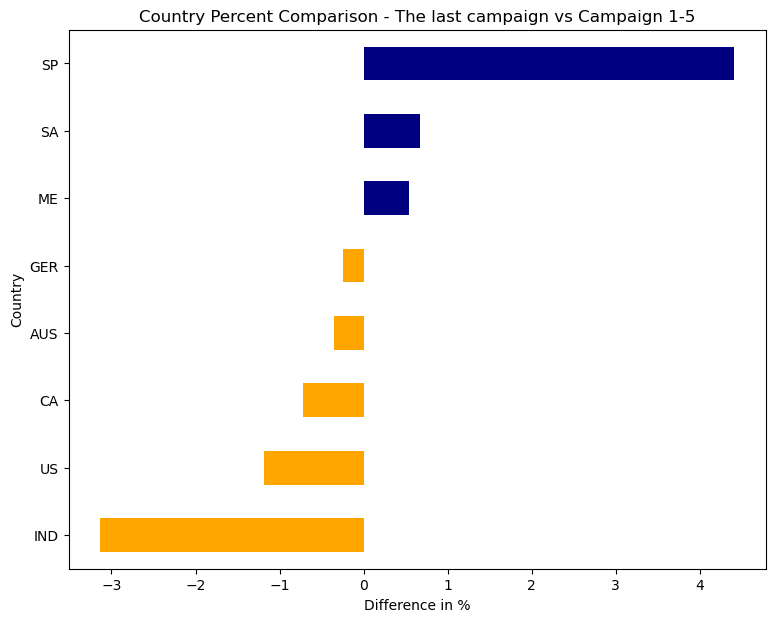

In [138]:
country_final = cp_last_country-cp__the_rest2_country

# visualize the differences
plt.figure(figsize = (9, 7))
country_final.sort_values(by="Percent",inplace = True)
country_final['positive'] = country_final["Percent"] >=0
country_final["Percent"].plot(kind='barh', color=country_final.positive.map({True: 'navy', False: 'orange'}))
plt.title("Country Percent Comparison - The last campaign vs Campaign 1-5")
plt.xlabel("Difference in %")
plt.ylabel("Country")
plt.savefig('Country Percent Comparison - The last campaign vs Campaign 1-5', bbox_inches='tight');

In [139]:
new_df.Country.value_counts()

SP     1094
SA      336
CA      268
AUS     160
IND     147
GER     120
US      109
ME        3
Name: Country, dtype: int64

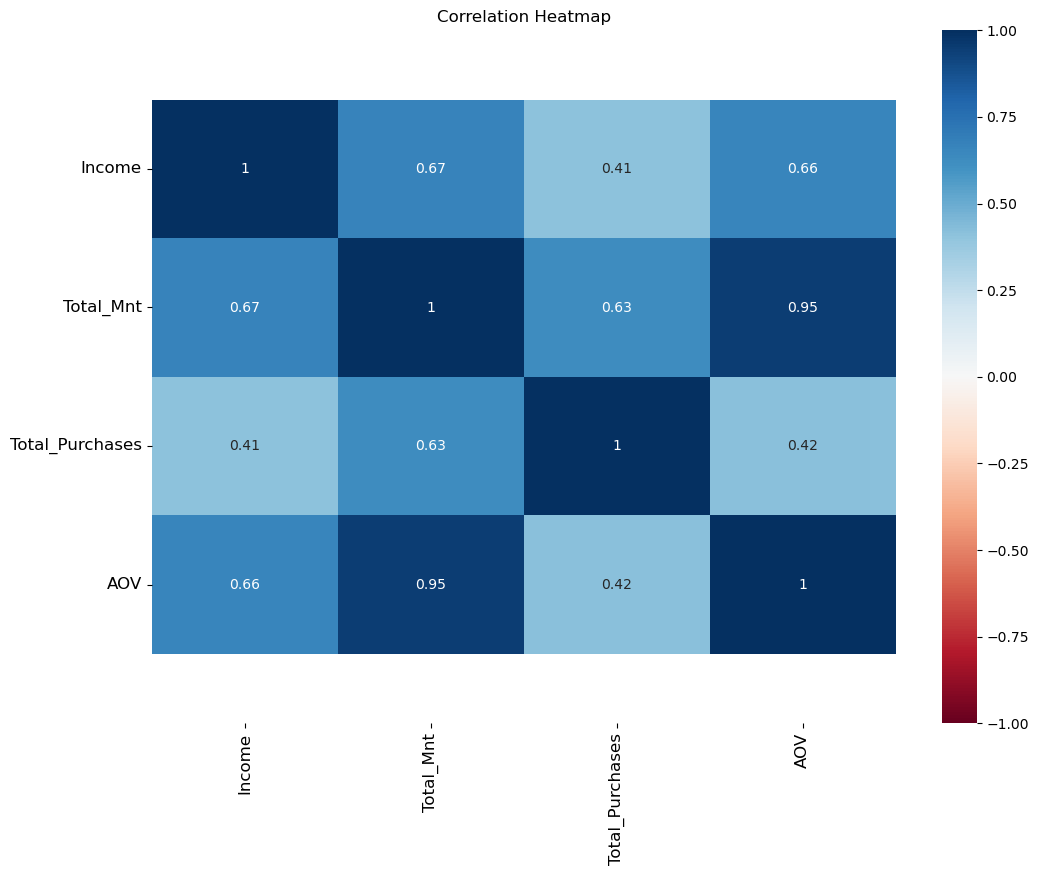

In [140]:
# select columns to plot
new_df2 = new_df[new_df.AOV <= (new_df.AOV.mean()+3*new_df.AOV.std())]
new_df2.replace([np.inf, -np.inf], 0, inplace=True)
new_df2 = new_df2[new_df2.Total_num_purchase <= (new_df2.Total_num_purchase.mean()+3*new_df2.Total_num_purchase.std())]
new_df2 = new_df2[new_df2.Total_Mnt <= (new_df2.Total_Mnt.mean()+3*new_df2.Total_Mnt.std())]

df_to_plot = new_df2[['Income', 'Total_Mnt','Total_num_purchase', 'AOV']]
df_to_plot.rename(columns={'Total_num_purchase':'Total_Purchases'}, inplace=True)

# create heatmap
plt.figure(figsize = (12, 9))
s = sb.heatmap(df_to_plot.corr(),  annot = True,cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap2.png', bbox_inches='tight')
plt.show()

In [141]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

In [142]:
# drop ID as everyone has unique ID
rd_df = new_df.drop(columns=['ID', 'Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding
rd_df = pd.get_dummies(rd_df)

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=rd_df.drop(columns=['Total_accept'])  # Features
y=rd_df['Total_accept']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Classifier with 100 trees
rg2 = RandomForestRegressor(n_estimators=200, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rg2.fit(X_train, y_train)

y_pred=rg2.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.43564900439342413
Mean Squared Error: 0.53053727420327
Root Mean Squared Error: 0.7283798968967156


In [143]:
from scipy.stats import pearsonr

list_ = ['MntWines', 'MntMeatProducts','MntGoldProds', 'MntFishProducts', 'MntFruits',  'MntSweetProducts']
for i in list_:
    r, p_value  =  pearsonr(x=new_df[i], y=new_df['Total_accept'])
    print(i, "vs Total_accept:")
    # print results
    print('Pearson correlation (r): ', r)
    print('Pearson p-value: ', p_value)
    print(" ")

MntWines vs Total_accept:
Pearson correlation (r):  0.4787761368904706
Pearson p-value:  1.5384536902711436e-128
 
MntMeatProducts vs Total_accept:
Pearson correlation (r):  0.30103342502969976
Pearson p-value:  4.4065093290162226e-48
 
MntGoldProds vs Total_accept:
Pearson correlation (r):  0.19068006658523506
Pearson p-value:  9.275051767780243e-20
 
MntFishProducts vs Total_accept:
Pearson correlation (r):  0.1591461828125727
Pearson p-value:  3.697344094817946e-14
 
MntFruits vs Total_accept:
Pearson correlation (r):  0.1497632666014454
Pearson p-value:  1.0826316641120389e-12
 
MntSweetProducts vs Total_accept:
Pearson correlation (r):  0.17808985183102097
Pearson p-value:  2.1328375413165896e-17
 


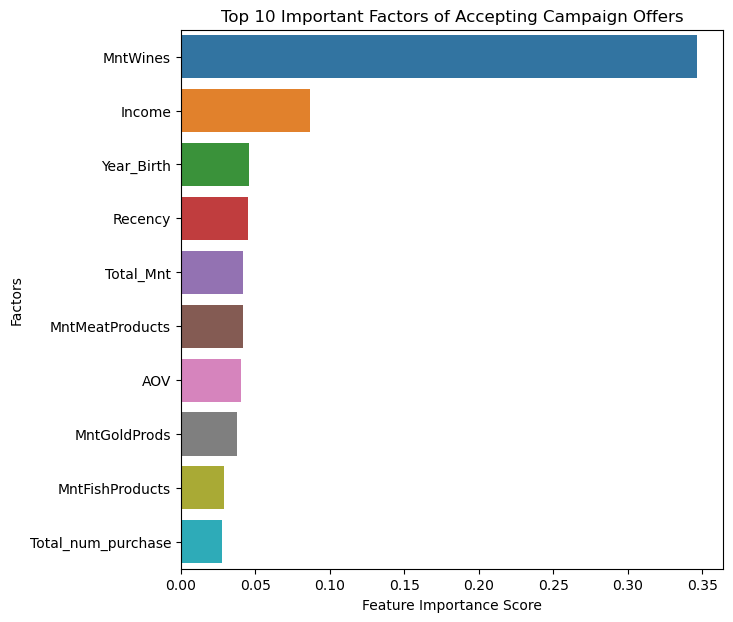

In [144]:
# find feature importance scores
import pandas as pd
feature_imp = pd.Series(rg2.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sb.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Factors')
plt.title("Top 10 Important Factors of Accepting Campaign Offers")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

In [145]:
new_df[['Join_month', 'Join_weekday']].mean()

Join_month      6.465802
Join_weekday    2.988824
dtype: float64

## Section 04: CMO Recommendations

### Summaries

- The last campaign performed nearly twice as good as the previous campaigns
    - The last campaign attracted more valuable customers in terms of AOV, the total amount spent, and the total number of purchases, compared to the customers who were attracted by the previous campaigns.
    - Spain has relatively more customers (+4%) that were attracted to the last campaign, and India has fewer customers (-3%) that were attracted to the previous campaigns
    - In terms of product categories, the customers in the last campaign spent nearly two times more money on meat products and wines compared to the customers in the previous campaigns.
    - In terms of purchasing channels, the customers in the last campaign purchased more evenly through stores, websites, and catalogs, whereas the customers in the previous campaigns mostly purchased through stores and websites.
    - The customers in the last campaign earned 20% more salary than the customers in the previous campaigns.
    
    
- Most customers purchase through physical stores, where people tend to spend more amount per purchase. The reason might be the customers had more impulsive purchases when they saw other similar products in stores.


- People having kids at home are less valuable customers as they...
    - tend to purchase less
    - tend to has a high number of purchases made with a discount
    
    
- The average customer...
    - became a customer on Thursdays
    - became a customer in Mid-June
    
### Actionable Data-Driven Solutions

#### On Acquisition:
1. Keep using the same marketing techniques in the last campaign, and with a focus on promoting meat products and wines

2. Try to spend more marketing budget in Spain, and less in India

3. Try to have a brand discount day on Thursday or a brand discount month in June to attract new customers

#### On Increasing revenue:

1. Have marketing campaigns to convert customers who shop mostly on a website or catalog to in-store purchasers as most in-store purchases have high average order volume.

2. Build a loyalty program to make high-income customers loyal as long as possible 